# Install requirements

In [2]:
%pip install --upgrade numpy scipy pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/substance.git@master

  Cloning https://github.com/ParkhomenkoDV/substance.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-rsonq_i3
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/substance.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-rsonq_i3
  Resolved https://github.com/ParkhomenkoDV/substance.git to commit ee75749da2a59d511d1e2f8c4c7df036749135f1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached openpyxl-3

In [4]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/disk.git@master

  Cloning https://github.com/ParkhomenkoDV/disk.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-a94ci_pn
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/disk.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-a94ci_pn
  Resolved https://github.com/ParkhomenkoDV/disk.git to commit 87006185980ba81c6152768e734a4cd37c546111
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pytest-8.3.5-py3-none-any.whl.metadata (7.6 kB)
  Cloning https://github.com/ParkhomenkoDV/decorators.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-8m4cg5jf/decorators_f6a56fbc72fe4ca1981ba028267cbbca
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/decorators.g

**Restart kernel!**

# Import libraries

In [1]:
from numpy import array, arange, linspace
from scipy import interpolate
import pandas as pd

In [2]:
from substance import Material
from disk import Disk

ModuleNotFoundError: No module named 'disk'

# Create material

In [3]:
material = Material('10Х11Н20ТЗР',
                            {
                                "density": 8400,
                                "alpha": 18 * 10 ** -6,
                                "E": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                          array([1.74, 1.66, 1.57, 1.47, 1.32]) * 10 ** 11,
                                                          kind=3, bounds_error=False, fill_value='extrapolate'),
                                "mu": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                           [0.384, 0.379, 0.371, 0.361, 0.347],
                                                           kind=3, bounds_error=False, fill_value='extrapolate'),
                                "sigma_s": 900 * 10 ** 6
                            })

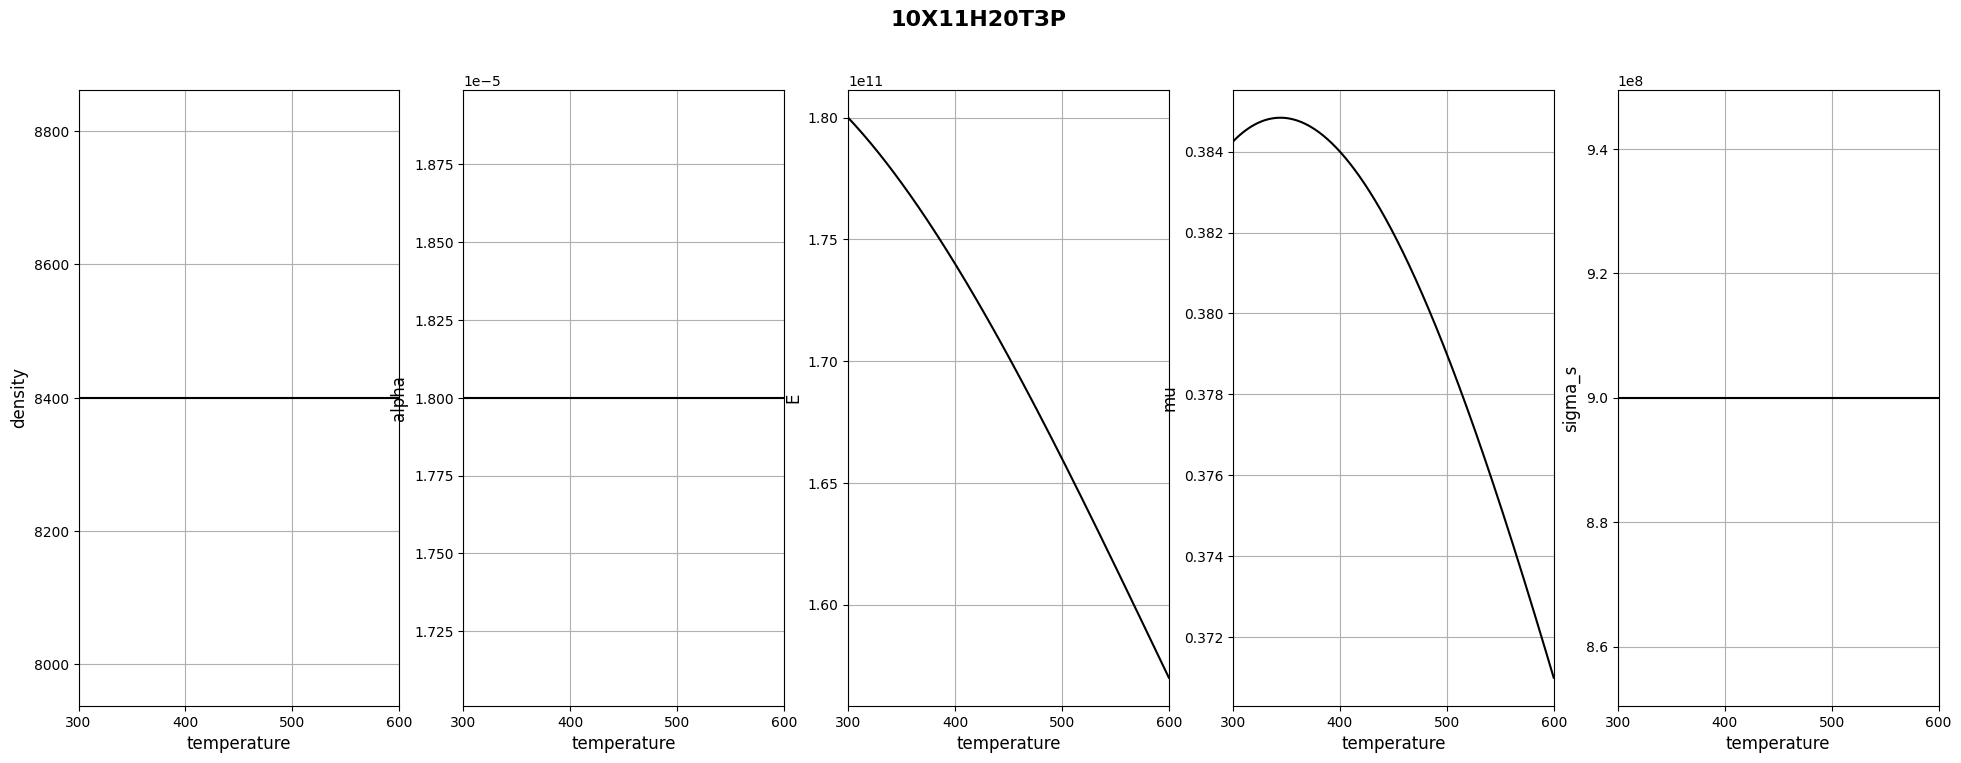

In [4]:
material.show(temperature=linspace(300, 600, 3+1), figsize=(24, 8))

# Create disk geometry

In [5]:
radius = array([20, 26, 30.62, 37.26, 56.94, 60.67, 72.95, 75.95, 102.41, 106.52, 109.82]) / 1000
thickness = array([36, 36, 15.43, 11.27, 10, 12, 12, 8, 6, 11, 11]) / 1000
nholes, rholes, dholes = [5], [66.8 / 1000], [6.2 / 1000]

disk = Disk(material=material,
            radius=radius, thickness=thickness,
            nholes=nholes, rholes=rholes, dholes=dholes)

In [6]:
print(pd.DataFrame({'radius': disk.radius, 'thickness': disk.thickness}))

     radius  thickness
0   0.02000    0.03600
1   0.02600    0.03600
2   0.03062    0.01543
3   0.03726    0.01127
4   0.05694    0.01000
5   0.06067    0.01200
6   0.07295    0.01200
7   0.07595    0.00800
8   0.10241    0.00600
9   0.10652    0.01100
10  0.10982    0.01100


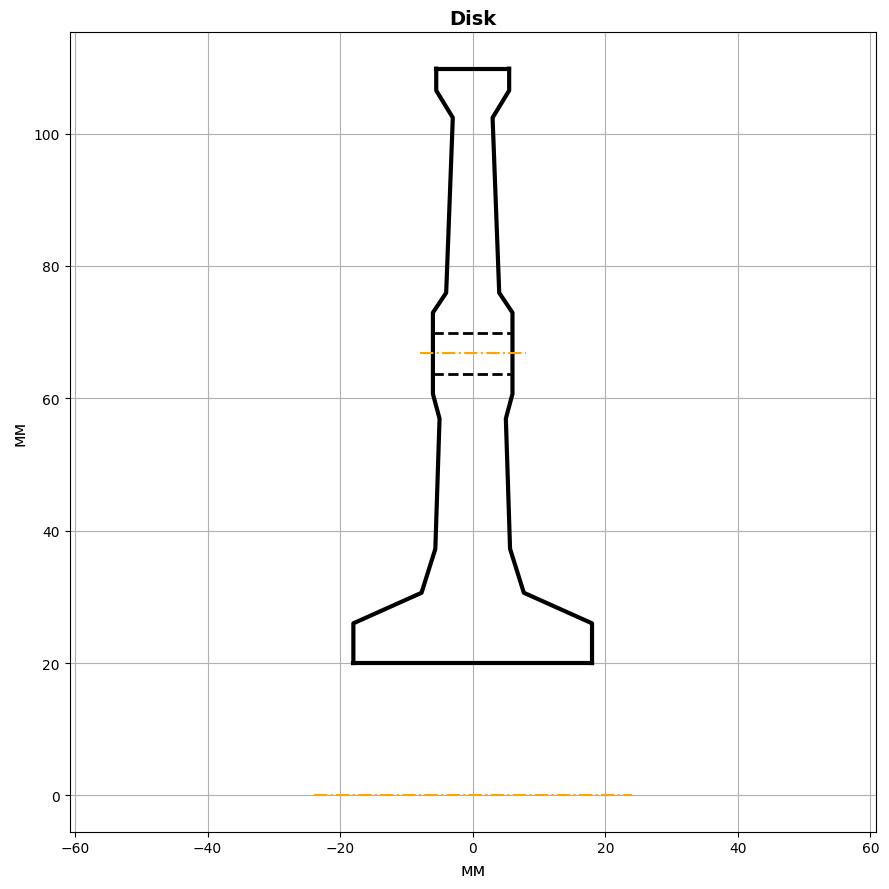

In [7]:
disk.show(figsize=(9, 9), xlabel='мм', ylabel='мм')

# Create conditions

In [8]:
rotation_frequency = 2806.2
temperature0 = 293.15
pressure = (0, 120.6 * 10 ** 6)
temperature = (350, 650)

condition = dict(rotation_frequency=rotation_frequency, temperature0=temperature0, pressure=pressure, temperature=temperature)

# Tensions

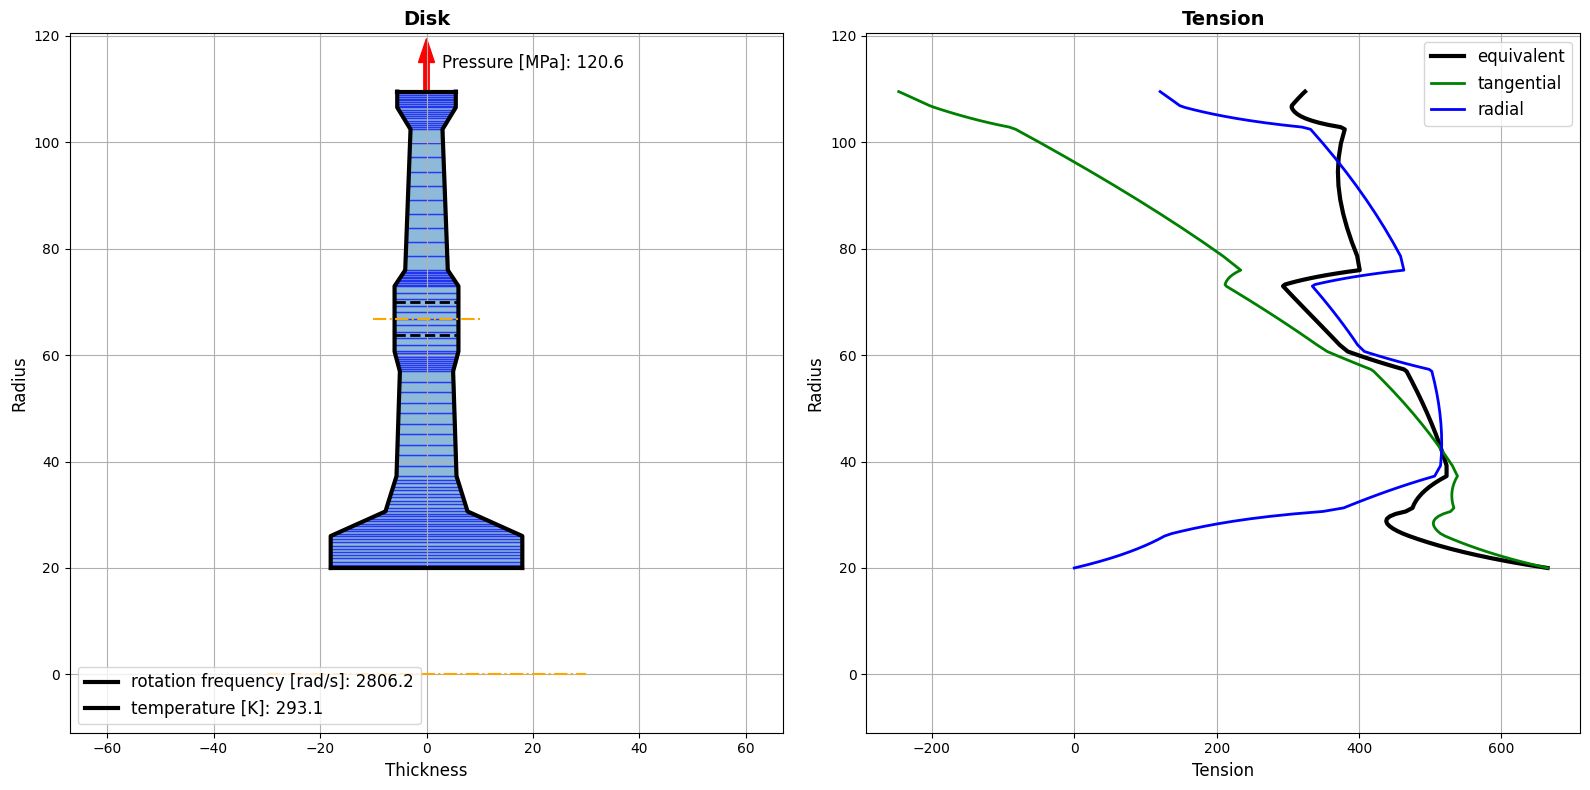

In [9]:
tensions = disk.tensions(**condition, discreteness=10, show=True)

In [10]:
f_sigma_t = interpolate.interp1d(tensions['radius'], tensions['tension_t'], kind=1)
f_sigma_r = interpolate.interp1d(tensions['radius'], tensions['tension_r'], kind=1)
for i in range(len(disk.nholes)):
    local_tension = disk.local_tension(disk.nholes[i],  disk.rholes[i], disk.dholes[i],
                                        float(f_sigma_t(disk.rholes[i])), float(f_sigma_r(disk.rholes[i])))
    print(f'holes: {i}, nholes []: {disk.nholes[i]}, rholes: {disk.rholes[i]}, dholes: {disk.dholes[i]}')
    print(f'tension_t in {local_tension}')


holes: 0, nholes []: 5, rholes: 0.0668, dholes: 0.0062
tension_t in (512.5422761589399, 535.8396523479826)


# Design equal strength disk

In [11]:
equal_strength = disk.equal_strength(400 * 10 ** 6, condition["rotation_frequency"], max(condition['temperature']), ndis=10, show=False)

In [12]:
radius_equal_strength = linspace(0, disk.radius[-1], 10, endpoint=True)
thickness_equal_strength = equal_strength(radius_equal_strength)

disk_equal_strength = Disk(material=disk.material, radius=radius_equal_strength, thickness=thickness_equal_strength)

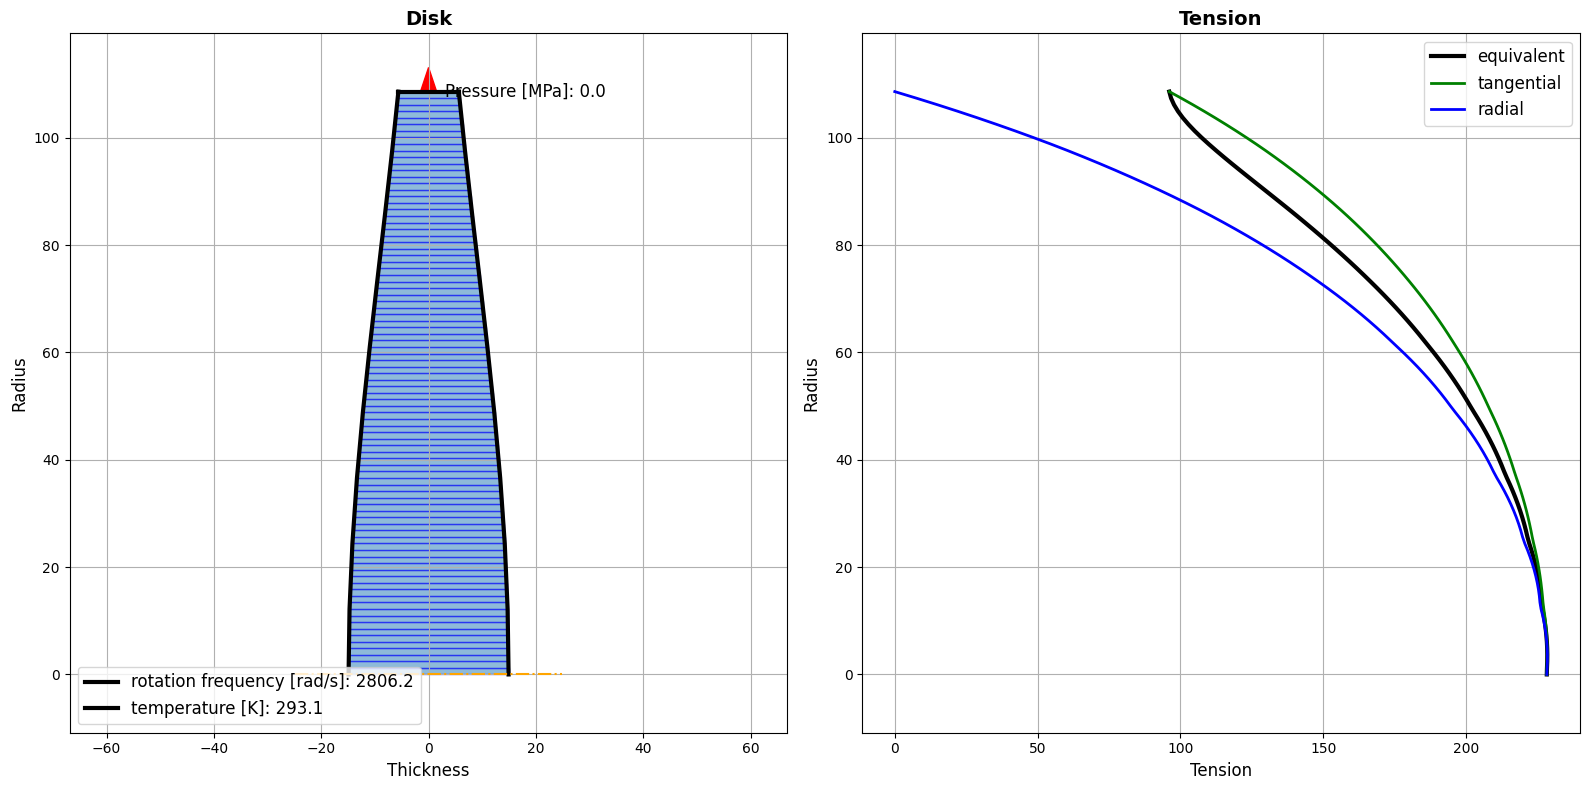

In [13]:
tensions = disk_equal_strength.tensions(rotation_frequency=condition['rotation_frequency'],
                                    temperature0=condition['temperature0'],
                                    pressure=(0, 0), temperature=(700, 700),
                                    discreteness=10, show=True)

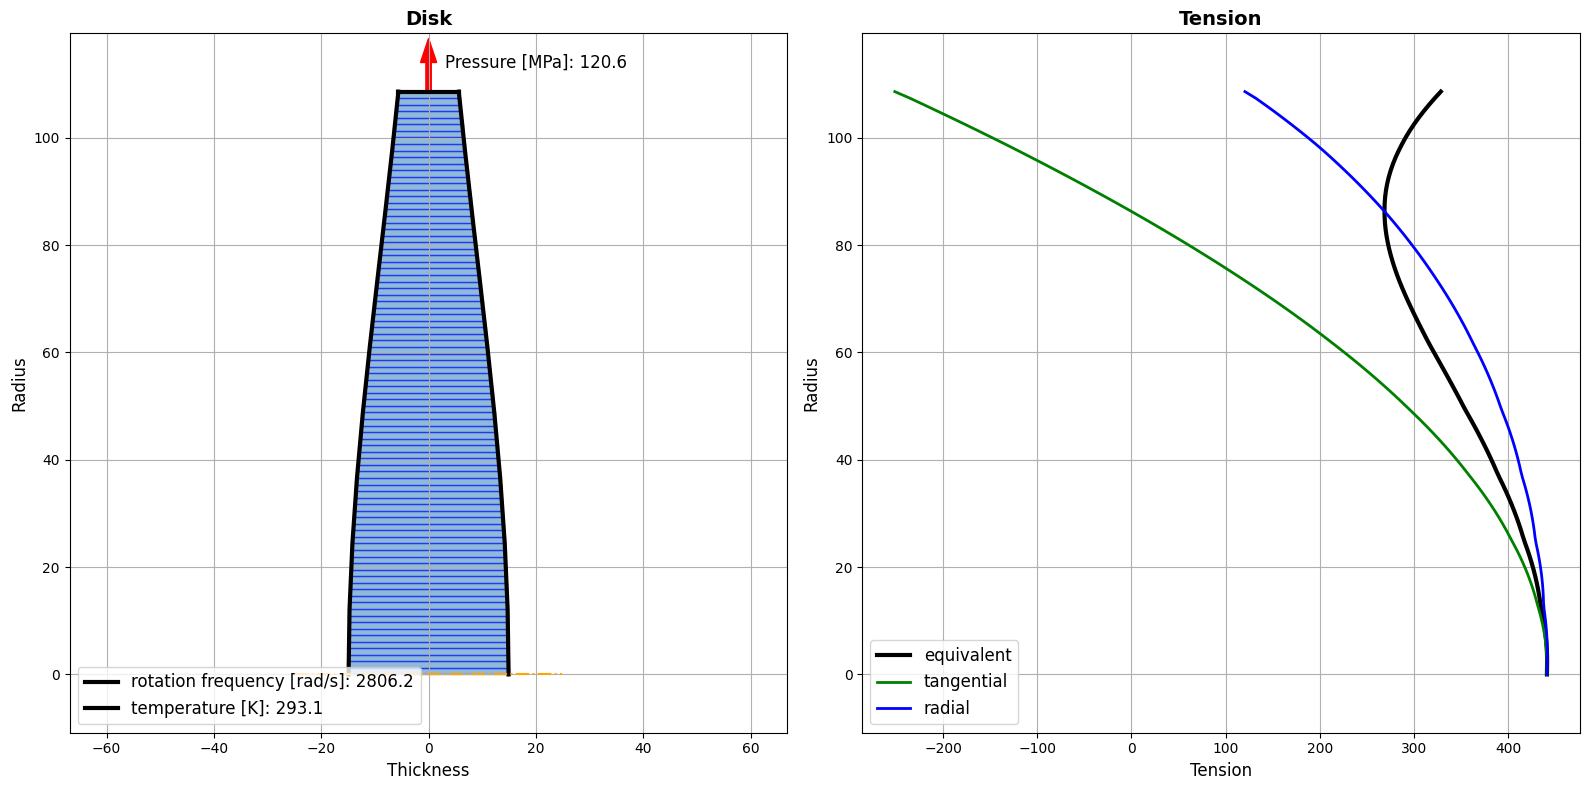

In [14]:
tensions = disk_equal_strength.tensions(**condition, discreteness=10, show=True)

In [15]:
disk.frequency_safety_factor(condition["rotation_frequency"], temperature=600, pressure=pressure)

((1.8108353315127532, 1.9114372943745725), '')

# Natural frequencies

In [16]:
for name, fastening in zip(('РК', 'НА'),(0, -1)):
    print(f'{name}: {fastening = }')
    for d in range(0, 3+1, 1): # число узловых диаметров
        for c in range(0, 3+1, 1): # число узловых окружностей
            print('\t'+f'{d = } {c = } {disk.natural_frequencies(fastening, d, c)}')

РК: fastening = 0
	d = 0 c = 0 (1067.2864718484748, '1/s')
	d = 0 c = 1 (5951.189367027096, '1/s')
	d = 0 c = 2 (17270.118163137457, '1/s')
	d = 0 c = 3 (nan, '1/s')
	d = 1 c = 0 (973.365262325809, '1/s')
	d = 1 c = 1 (7843.844043771724, '1/s')
	d = 1 c = 2 (nan, '1/s')
	d = 1 c = 3 (nan, '1/s')
	d = 2 c = 0 (1534.046422203541, '1/s')
	d = 2 c = 1 (9904.418458753846, '1/s')
	d = 2 c = 2 (nan, '1/s')
	d = 2 c = 3 (nan, '1/s')
	d = 3 c = 0 (3554.775475569987, '1/s')
	d = 3 c = 1 (15169.698386539654, '1/s')
	d = 3 c = 2 (nan, '1/s')
	d = 3 c = 3 (nan, '1/s')
НА: fastening = -1
	d = 0 c = 0 (2914.403592460902, '1/s')
	d = 0 c = 1 (11327.467087885145, '1/s')
	d = 0 c = 2 (25330.265598537135, '1/s')
	d = 0 c = 3 (45053.71959829696, '1/s')
	d = 1 c = 0 (6047.956673808024, '1/s')
	d = 1 c = 1 (17304.271330236606, '1/s')
	d = 1 c = 2 (34153.16709915119, '1/s')
	d = 1 c = 3 (56637.335439425726, '1/s')
	d = 2 c = 0 (9562.886787762334, '1/s')
	d = 2 c = 1 (24077.98280490159, '1/s')
	d = 2 c = 2 (4

# Campbell diagram

/Users/daniilandryushin/Projects/disk/.venv/lib/python3.12/site-packages/disk/disk.py:509: RuntimeWarning: divide by zero encountered in scalar divide
  x0 = f[0] / sqrt(k ** 2 - B(radius, N, S))  # f
/Users/daniilandryushin/Projects/disk/.venv/lib/python3.12/site-packages/disk/disk.py:519: RuntimeWarning: divide by zero encountered in scalar divide
  x0 = f[0] / sqrt(k ** 2 - B(radius, N, S) + N ** 2 - 2 * k * N)  # f_plus


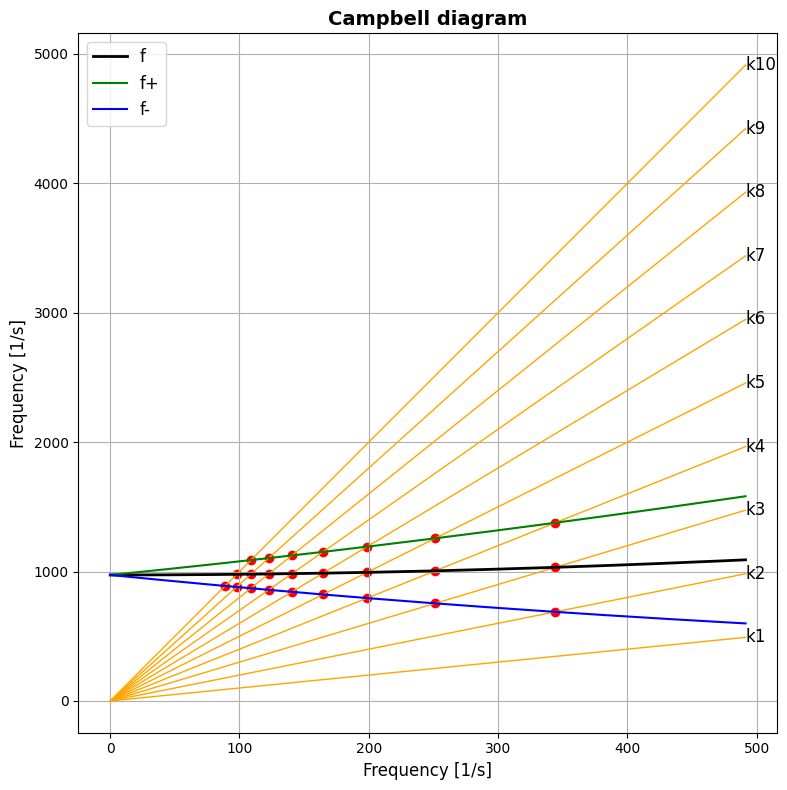

In [24]:
resonance = disk.campbell_diagram(0, 1, 0, condition["rotation_frequency"] * 1.1, multiplicity=arange(1, 10+1, 1))

In [18]:
resonance

((), '1/s')